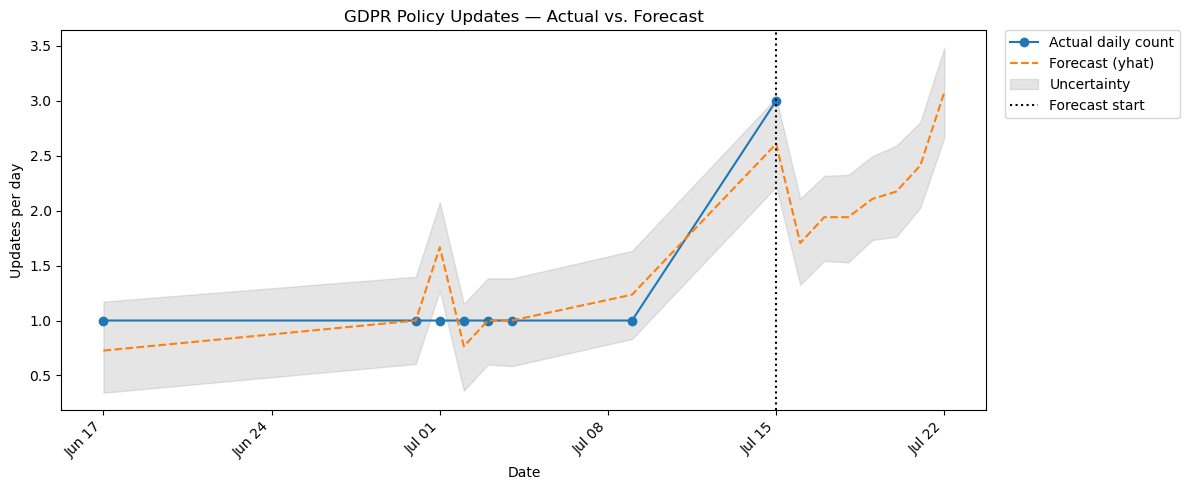

In [2]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1) Load your processed daily counts:
# counts = (
#     pd.read_csv("data/processed/cleaned_policies.csv", parse_dates=["date"])
#       .groupby("date").size().reset_index(name="y")
#       .rename(columns={"date": "ds"})
# )

counts = (
    pd.read_csv(
        "../data/processed/cleaned_policies.csv",
        parse_dates=["date"],
    )
    .groupby("date")
    .size()
    .reset_index(name="y")
    .rename(columns={"date": "ds"})
)

# 2) Load the latest forecast:
# forecast_path = sorted(glob.glob("data/forecasts/forecast_*.csv"))[-1]
# fc = pd.read_csv(forecast_path, parse_dates=["ds"])
forecast_path = sorted(
    glob.glob(
        "../data/forecasts/forecast_*.csv"
    )
)[-1]
fc = pd.read_csv(forecast_path, parse_dates=["ds"])

# 3) Plot with cleaner formatting:
fig, ax = plt.subplots(figsize=(12, 5))

# actuals
ax.plot(counts["ds"], counts["y"],
        marker="o", linestyle="-", label="Actual daily count")

# forecast
ax.plot(fc["ds"], fc["yhat"],
        linestyle="--", label="Forecast (yhat)")
ax.fill_between(fc["ds"], fc["yhat_lower"], fc["yhat_upper"],
                color="gray", alpha=0.2, label="Uncertainty")

# vertical line
ax.axvline(counts["ds"].max(),
           color="k", linestyle=":", label="Forecast start")

# Date formatting: one tick per week, rotated
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b %d"))
plt.setp(ax.get_xticklabels(), rotation=45, ha="right")

# Legend outside
ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1), borderaxespad=0)

# Labels and title
ax.set_title("GDPR Policy Updates — Actual vs. Forecast")
ax.set_xlabel("Date")
ax.set_ylabel("Updates per day")

plt.tight_layout()
plt.show()


**Interpretation of “Actual vs. Forecast” Plot**

1. **Historical stability (mid-June to early July):**

   * The actual daily counts hovered steadily around **1 update per day**
   * The model’s fitted values (orange dashed line) closely track that flat trend, with **narrow uncertainty bands**.

2. **Mid-July spike:**

   * On **July 15**, there’s a sudden jump to **3 updates in one day**.
   * The model captures this jump in its forecast, but you can see **wider uncertainty** immediately afterward, reflecting that such a sharp change is harder to predict.

3. **Forecast horizon (right of the dotted line):**

   * After the spike, the forecast dips slightly, then predicts a **gradual rise** back toward \~3 updates per day by late July.
   * The **shaded band** grows wider as you move further out, indicating **increasing uncertainty** about the exact update volume.

4. **Key takeaway:**

   * Your pipeline’s forecasting component successfully learned the recent upward trend in policy activity, but also correctly signals growing uncertainty for future dates.
   * If you see more surges like mid-July, you may need to incorporate additional regressors (e.g., known policy events) to improve prediction accuracy.
